In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Color and Temperature
Colors bring you temperature (by feeling). Normally, when editting photo, we choose a temperature to make our picture look warmer or colder to match to style of a picture. 

Scientifically, what is necessary for changing the temperature of the image is the relationship of the temperature and its emitting color (RGB) from a black-body. Thankfully, there are honorable scientist finished these job for us and we can use their experiment result

website : http://www.vendian.org/mncharity/dir3/blackbody/UnstableURLs/bbr_color.txt

In [2]:
# Load the data of black-body radiation

columns = ['Temp', 'CMF', 'x', 'y', 'Power', 'R', 'G', 'B', 'r', 'g', 'b', '#rgb']
df_temp = pd.read_csv('data/bbr_color.txt', skiprows=19, skipfooter=1, header=None, delim_whitespace=True)
df_temp = df_temp.drop(1, axis=1)
df_temp.columns = columns

C:\Anaconda\envs\chatbot\lib\site-packages\ipykernel\__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [3]:
# use only one CMF = 10deg (1964)
df_temp = df_temp.drop_duplicates(['Temp'],keep='last')
df_temp.head(10)

,Temp,CMF,x,y,Power,R,G,B,r,g,b,#rgb
1,1000,10deg,0.6472,0.3506,2.525000e+06,1.0,0.0401,0.0,255,56,0,#ff3800
3,1100,10deg,0.6348,0.3612,2.162000e+07,1.0,0.0631,0.0,255,71,0,#ff4700
5,1200,10deg,0.6225,0.3710,1.314000e+08,1.0,0.0860,0.0,255,83,0,#ff5300
7,1300,10deg,0.6104,0.3797,6.118000e+08,1.0,0.1085,0.0,255,93,0,#ff5d00
9,1400,10deg,0.5983,0.3874,2.306000e+09,1.0,0.1303,0.0,255,101,0,#ff6500
11,1500,10deg,0.5864,0.3940,7.333000e+09,1.0,0.1515,0.0,255,109,0,#ff6d00
13,1600,10deg,0.5747,0.3996,2.028000e+10,1.0,0.1718,0.0,255,115,0,#ff7300
15,1700,10deg,0.5632,0.4041,4.999000e+10,1.0,0.1912,0.0,255,121,0,#ff7900
17,1800,10deg,0.5519,0.4077,1.118000e+11,1.0,0.2097,0.0,255,126,0,#ff7e00
19,1900,10deg,0.5408,0.4104,2.305000e+11,1.0,0.2272,0.0,255,131,0,#ff8300


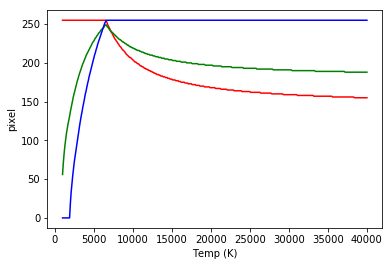

In [4]:
# Plot the RGB according to temperature
plt.plot(df_temp.Temp, df_temp.r, color='r')
plt.plot(df_temp.Temp, df_temp.g, color='g')
plt.plot(df_temp.Temp, df_temp.b, color='b')
plt.xlabel('Temp (K)')
plt.ylabel('pixel')
plt.show()

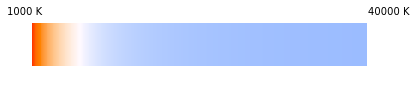

In [5]:
# Let's plot the color bar
# It starts from 1000 K to 40000 K
rgb_array = df_temp[['r','g','b']].values
tmp_img = np.tile(np.expand_dims(rgb_array, axis=0), (50,1,1)).astype(np.uint8)
plt.axis('off')
plt.text(-30, -10, '1000 K')
plt.text(tmp_img.shape[1], -10, '40000 K')
plt.imshow(tmp_img)

# Let's try to play around with temperature
Let's assume that our image is already white-balanced (~6600K), we will adjust the temperature of the image by searching in the lookup table from temperature to rgb color. For an obtained rgb, we process the image by the following equation

$$
\begin{bmatrix}
   r' \\
   g' \\
   b' 
\end{bmatrix}
= 
\begin{bmatrix}
    r_t / 255 \\
    b_t / 255 \\
    g_t / 255
\end{bmatrix} \odot
\begin{bmatrix}
    r \\
    g \\
    b
\end{bmatrix}
$$

which $r', r_t, r$ are new pixel value, looked up value and old pixel value respectively. Also, $\odot$ is element-wise multiplication

In [6]:
# Set a look up table
lookup_table = dict(zip(df_temp.Temp, df_temp[['r','g','b']].values))

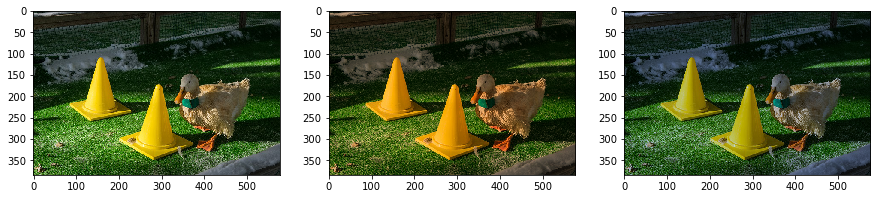

In [7]:
# Change the temp, in the range of 1000 - 40000 K, multiplication of 100
# Assume that our image is white-balanced 6600 K
# Warmer temperature should be < 6600 K
# Colder > 6600 K
img = plt.imread('data/duck.jpg')
warmer_tmp = 4000 # change this !
colder_tmp = 12000 # change this !
warmer_img = (img * lookup_table[warmer_tmp].astype(np.float32) / 255.).astype(np.uint8)
colder_img = (img * lookup_table[colder_tmp].astype(np.float32) / 255.).astype(np.uint8)

figs, axes = plt.subplots(1,3, figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(warmer_img)
axes[2].imshow(colder_img)

# Reference
http://www.tannerhelland.com/4435/convert-temperature-rgb-algorithm-code/